### 📈 Race Pace Overview

This section analyzes driver performance by converting lap times into seconds and calculating statistics like mean, median, and best laps.  
It helps identify who had the most consistent pace and who delivered standout laps during the race.

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import fastf1.plotting
import seaborn as sns
import pandas as pd
import matplotlib.ticker as ticker
from fastf1 import utils
from fastf1.plotting import TEAM_COLORS
from fastf1.utils import delta_time
import matplotlib.colors as mcolors
from matplotlib.collections import LineCollection
import matplotlib as mpl
from typing import Union
from matplotlib.collections import LineCollection
from matplotlib.colors import LinearSegmentedColormap

/Users/PietroPaolo/opt/anaconda3/envs/progLab/lib/python3.9/site-packages/fastf1/plotting/__init__.py:84: FutureWarning: INCOMPATIBLE with 2025 season! TEAM_COLORS is deprecated and will be removed in a future version.
  warnings.warn(f"INCOMPATIBLE with 2025 season! {name} is deprecated "


In [6]:
# enable some matplotlib patches for plotting timedelta values and load
# FastF1's default color scheme
fastf1.plotting.setup_mpl(misc_mpl_mods=False, color_scheme='fastf1')


# load a session and its telemetry data
session = fastf1.get_session(2025, 'Belgium Grand Prix', 'Sprint')
session.load()
# Get only drivers who finished the race
results = session.results
# Exclude drivers who Retired, Did Not Start, or Did Not Finish
excluded_statuses = ['Retired', 'Did not start', 'Did not finish']

# Keep only drivers who have a clean status (finished the race)
finished_drivers = results[~results['Status'].isin(excluded_statuses)]['Abbreviation'].tolist()

# Get all laps, excluding box laps and inaccurate laps
laps = session.laps.pick_wo_box()
laps = laps[laps['IsAccurate'] == True]

# Filter only laps from drivers who finished the race
laps = laps[laps['Driver'].isin(finished_drivers)]

# Get circuit info (unchanged)
circuit_info = session.get_circuit_info()




core           INFO 	Loading data for Belgian Grand Prix - Sprint [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '81', '4', '16', '31', '55', '87', '6', '5', '30', '22', '63', '18', '14', '44', '23', '12', '27', '43', '10']


In [7]:
display(laps)

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
1,0 days 00:50:54.022000,VER,1,0 days 00:01:46.269000,2.0,1.0,NaT,NaT,0 days 00:00:30.851000,0 days 00:00:46.870000,...,False,Red Bull Racing,0 days 00:49:07.753000,2025-07-26 10:05:40.381,1,1.0,False,,False,True
2,0 days 00:52:40.272000,VER,1,0 days 00:01:46.250000,3.0,1.0,NaT,NaT,0 days 00:00:30.968000,0 days 00:00:46.691000,...,False,Red Bull Racing,0 days 00:50:54.022000,2025-07-26 10:07:26.650,1,1.0,False,,False,True
3,0 days 00:54:26.463000,VER,1,0 days 00:01:46.191000,4.0,1.0,NaT,NaT,0 days 00:00:30.900000,0 days 00:00:46.704000,...,False,Red Bull Racing,0 days 00:52:40.272000,2025-07-26 10:09:12.900,1,1.0,False,,False,True
4,0 days 00:56:12.885000,VER,1,0 days 00:01:46.422000,5.0,1.0,NaT,NaT,0 days 00:00:31.078000,0 days 00:00:46.645000,...,False,Red Bull Racing,0 days 00:54:26.463000,2025-07-26 10:10:59.091,1,1.0,False,,False,True
5,0 days 00:57:58.937000,VER,1,0 days 00:01:46.052000,6.0,1.0,NaT,NaT,0 days 00:00:30.906000,0 days 00:00:46.538000,...,False,Red Bull Racing,0 days 00:56:12.885000,2025-07-26 10:12:45.513,1,1.0,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,0 days 01:07:22.005000,COL,43,0 days 00:01:48.686000,11.0,1.0,NaT,NaT,0 days 00:00:31.187000,0 days 00:00:48.583000,...,True,Alpine,0 days 01:05:33.319000,2025-07-26 10:22:05.947,1,19.0,False,,False,True
281,0 days 01:09:10.654000,COL,43,0 days 00:01:48.649000,12.0,1.0,NaT,NaT,0 days 00:00:31.178000,0 days 00:00:48.474000,...,True,Alpine,0 days 01:07:22.005000,2025-07-26 10:23:54.633,1,19.0,False,,False,True
282,0 days 01:10:59.197000,COL,43,0 days 00:01:48.543000,13.0,1.0,NaT,NaT,0 days 00:00:31.263000,0 days 00:00:48.351000,...,True,Alpine,0 days 01:09:10.654000,2025-07-26 10:25:43.282,1,19.0,False,,False,True
283,0 days 01:12:47.708000,COL,43,0 days 00:01:48.511000,14.0,1.0,NaT,NaT,0 days 00:00:31.334000,0 days 00:00:48.250000,...,True,Alpine,0 days 01:10:59.197000,2025-07-26 10:27:31.825,1,19.0,False,,False,True


In [8]:
drivers =laps['Driver'].unique()
compounds = laps['Compound'].unique()


In [9]:
def timedelta_to_seconds(td: pd.Timedelta) -> float:
    """
    Convert a pandas Timedelta to a float representing the total seconds.

    Parameters:
    - td: pd.Timedelta

    Returns:
    - float: total seconds
    """
    return td.total_seconds()

In [10]:
# Transform the laps in total seconds
transformed_laps = laps.copy()
transformed_laps.loc[:, "LapTime (s)"] = laps["LapTime"].dt.total_seconds()



# order the team from the fastest (lowest median lap time) to slower
team_order = (
    transformed_laps[["Team", "LapTime (s)"]]
    .groupby("Team")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)

# make a color palette associating team names to hex codes

specific_color_kick_sauber = '#90EE90'  # Light green
specific_color_alpha_tauri = '#1634cb'  # Specific blue color

def get_team_color(team):
    # Clean up team names by stripping extra spaces
    team = team.strip()

    if team == 'Kick Sauber' or team == 'Alfa Romeo':
        return specific_color_kick_sauber
    elif team == 'AlphaTauri':
        return specific_color_alpha_tauri
    else:
        try:
            # Use the internal TEAM_COLORS dictionary for the team color
            return TEAM_COLORS[team.lower()]  # Ensure team name matches the expected format
        except KeyError:
            return '#000000'  # Default color (black) if team is not recognized

# Create the palette, ensuring teams are processed correctly
team_palette = {team: get_team_color(team) for team in team_order}

In [11]:
colors = {
    # Red Bull Racing
    "VER": "blue",  # Max Verstappen
    "TSU": "blue",  # Liam Lawson

    # McLaren
    "NOR": "orange",  # Lando Norris
    "PIA": "orange",  # Oscar Piastri

    # Ferrari
    "LEC": "red",    # Charles Leclerc§
    "HAM": "red",    # Lewis Hamilton

    # Mercedes
    "RUS": "grey",   # George Russell
    "ANT": "grey",   # Andrea Kimi Antonelli

    # Aston Martin
    "ALO": "green",  # Fernando Alonso
    "STR": "green",  # Lance Stroll

    # Alpine
    "GAS": "pink",   # Pierre Gasly
    "COL": "pink",   # Jack Doohan

    # Haas
    "OCO": "olive",  # Esteban Ocon
    "BEA": "olive",  # Oliver Bearman

    # Racing Bulls (formerly AlphaTauri)
    "HAD": "#9932CC",  # Isack Hadjar
    "LAW": "#9932CC",  # Yuki Tsunoda

    # Williams
    "ALB": "navy",   # Alexander Albon
    "SAI": "navy",   # Carlos Sainz Jr.

    # Sauber (transitioning to Audi)
    "HUL": "lime",   # Nico Hülkenberg
    "BOR": "lime",   # Gabriel Bortoleto
}

In [12]:
def interpolate_dataframe(df):
    # Creating a new DataFrame with interpolated data
    new_df = pd.DataFrame()

    for column in df.columns:
        # Interpolating each column
        original_data = df[column].to_numpy()
        interleaved_data = np.empty(2 * len(original_data) - 1, dtype=original_data.dtype)
        
        # Fill with original data in even indices
        interleaved_data[0::2] = original_data

        # Check the data type of the column
        if np.issubdtype(original_data.dtype, np.number):
            # Interpolated data for numerical columns
            interleaved_data[1::2] = (original_data[:-1] + original_data[1:]) / 2
        elif np.issubdtype(original_data.dtype, np.datetime64):
            # Interpolated data for datetime columns
            interleaved_data[1::2] = (original_data[:-1] + (original_data[1:] - original_data[:-1]) / 2)
        elif np.issubdtype(original_data.dtype, np.bool_):
            # For boolean columns, use logical interpolation (e.g., keep the previous value)
            interleaved_data[1::2] = original_data[:-1]
        else:
            # For any other types, fallback to forward fill
            interleaved_data[1::2] = original_data[:-1]

        # Assigning the new column to the new DataFrame
        new_df[column] = interleaved_data

    return new_df

### 🏁 Team Performance Comparison

Teams are ranked by their median lap time across the race.  
This gives a high-level overview of overall race competitiveness, showing which teams delivered strong race setups and consistent execution.

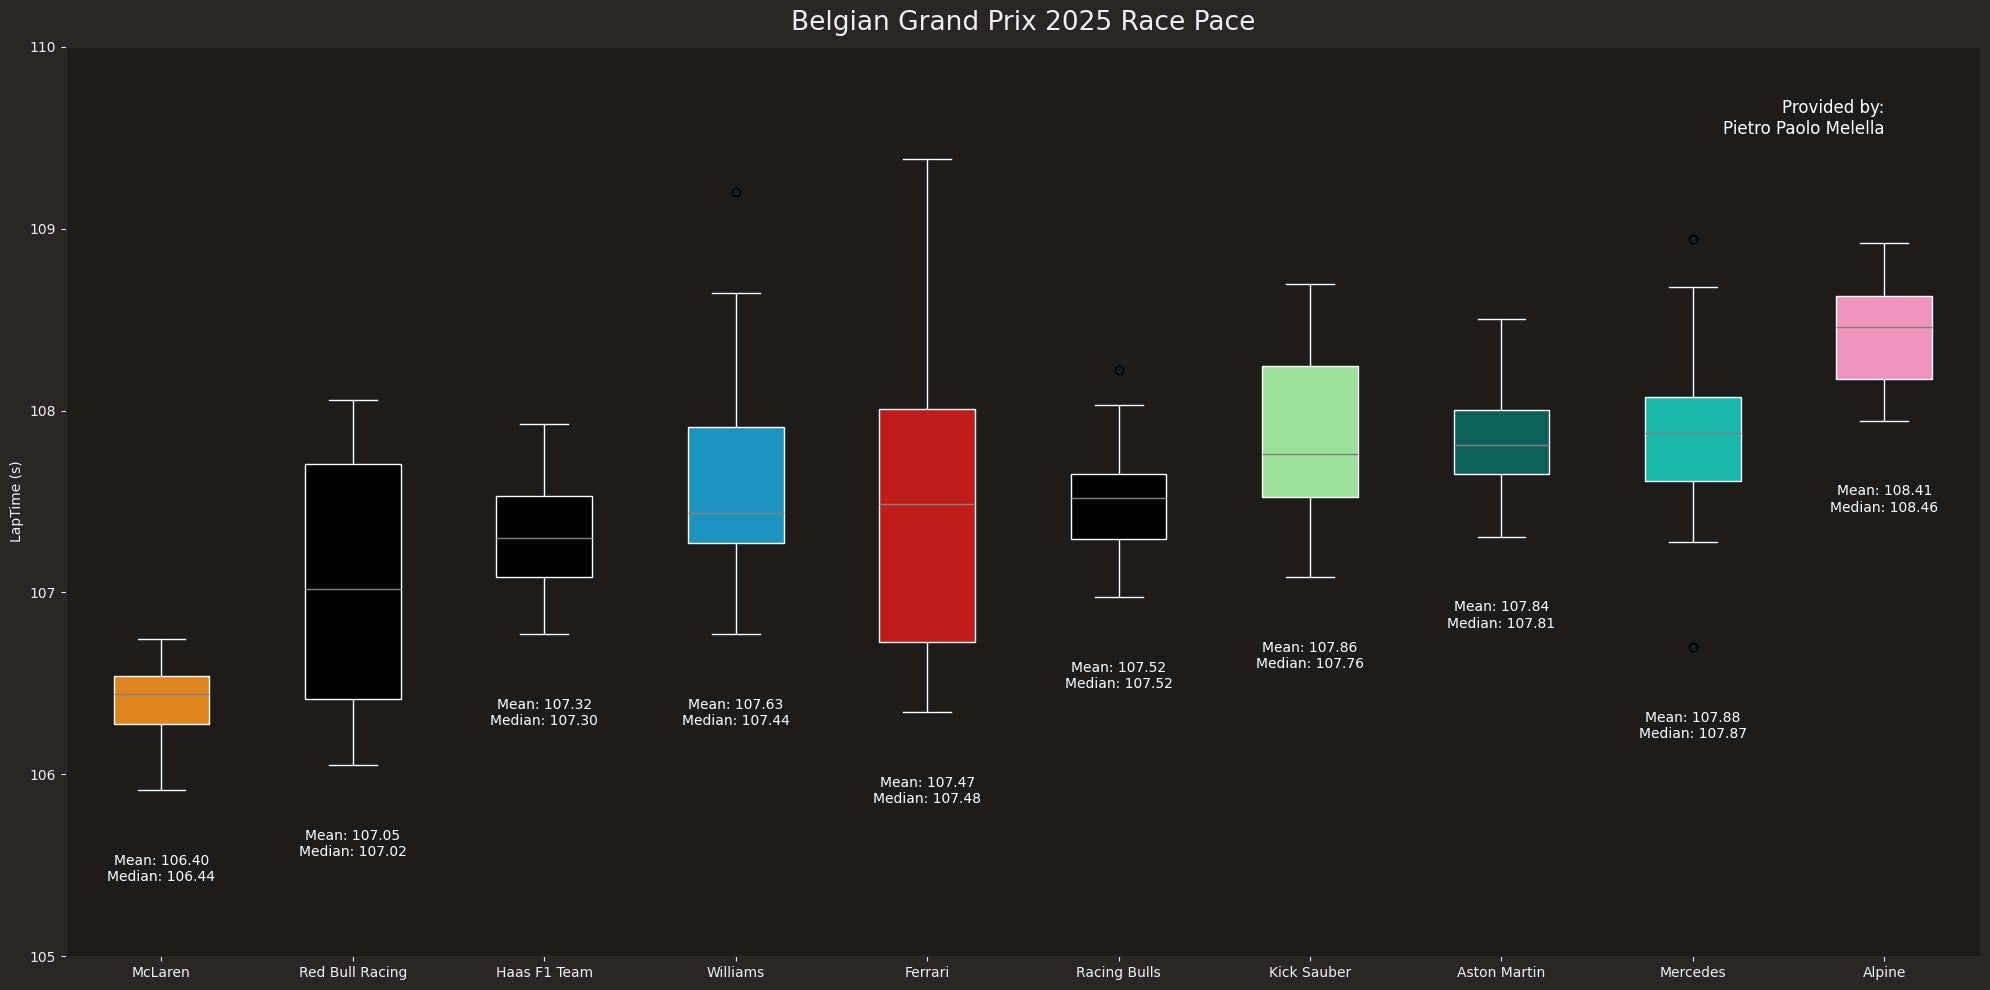

In [14]:
# First, calculate the mean and median times for each team
transformed_laps.reset_index(drop=True, inplace=True)

team_stats = transformed_laps.groupby('Team')['LapTime (s)'].agg(['mean', 'median', 'min', 'max'])

fig, ax = plt.subplots(figsize=(20, 10))  # Increased figure size to accommodate wider boxes
sns.boxplot(
    data=transformed_laps,
    x="Team",
    y="LapTime (s)",
    hue="Team",
    order=team_order,
    palette=team_palette,
    whiskerprops=dict(color="white"),
    boxprops=dict(edgecolor="white"),
    medianprops=dict(color="grey"),
    capprops=dict(color="white"),
    width=0.5,  # Increased width value
    dodge=False  # Ensure that boxes are centered under each team name
)

# Set y-axis limit (based on data range, adjust accordingly)
ax.set_ylim(105, 110)  # Example range, adjust based on your data

# Loop through the teams and add mean and median text under each whisker
for i, team in enumerate(team_order):
    # Get the whisker positions (min or max depending on where you want to place the label)
    whisker_position = team_stats.loc[team, 'min']  # Adjust to 'max' if you want the label under the upper whisker

    mean_time = team_stats.loc[team, 'mean']
    median_time = team_stats.loc[team, 'median']

    # Place the text slightly below the whisker (min value in this case), adjust y-position
    ax.text(
        i, whisker_position - 0.5,  # Adjust the y position slightly below the whisker
        f'Mean: {mean_time:.2f}\nMedian: {median_time:.2f}',
        horizontalalignment='center', color='white', fontsize=10
    )

# Update plot title and remove grid
plt.title(f"{session.event['EventName']} {session.event.year} Race Pace")
plt.grid(visible=False)

# Add source text in a more readable position
plt.text(
    0.95, 0.9, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='white', fontsize=12
)

# Remove redundant x-label
ax.set(xlabel=None)

# Tight layout and display
plt.tight_layout()
plt.show()

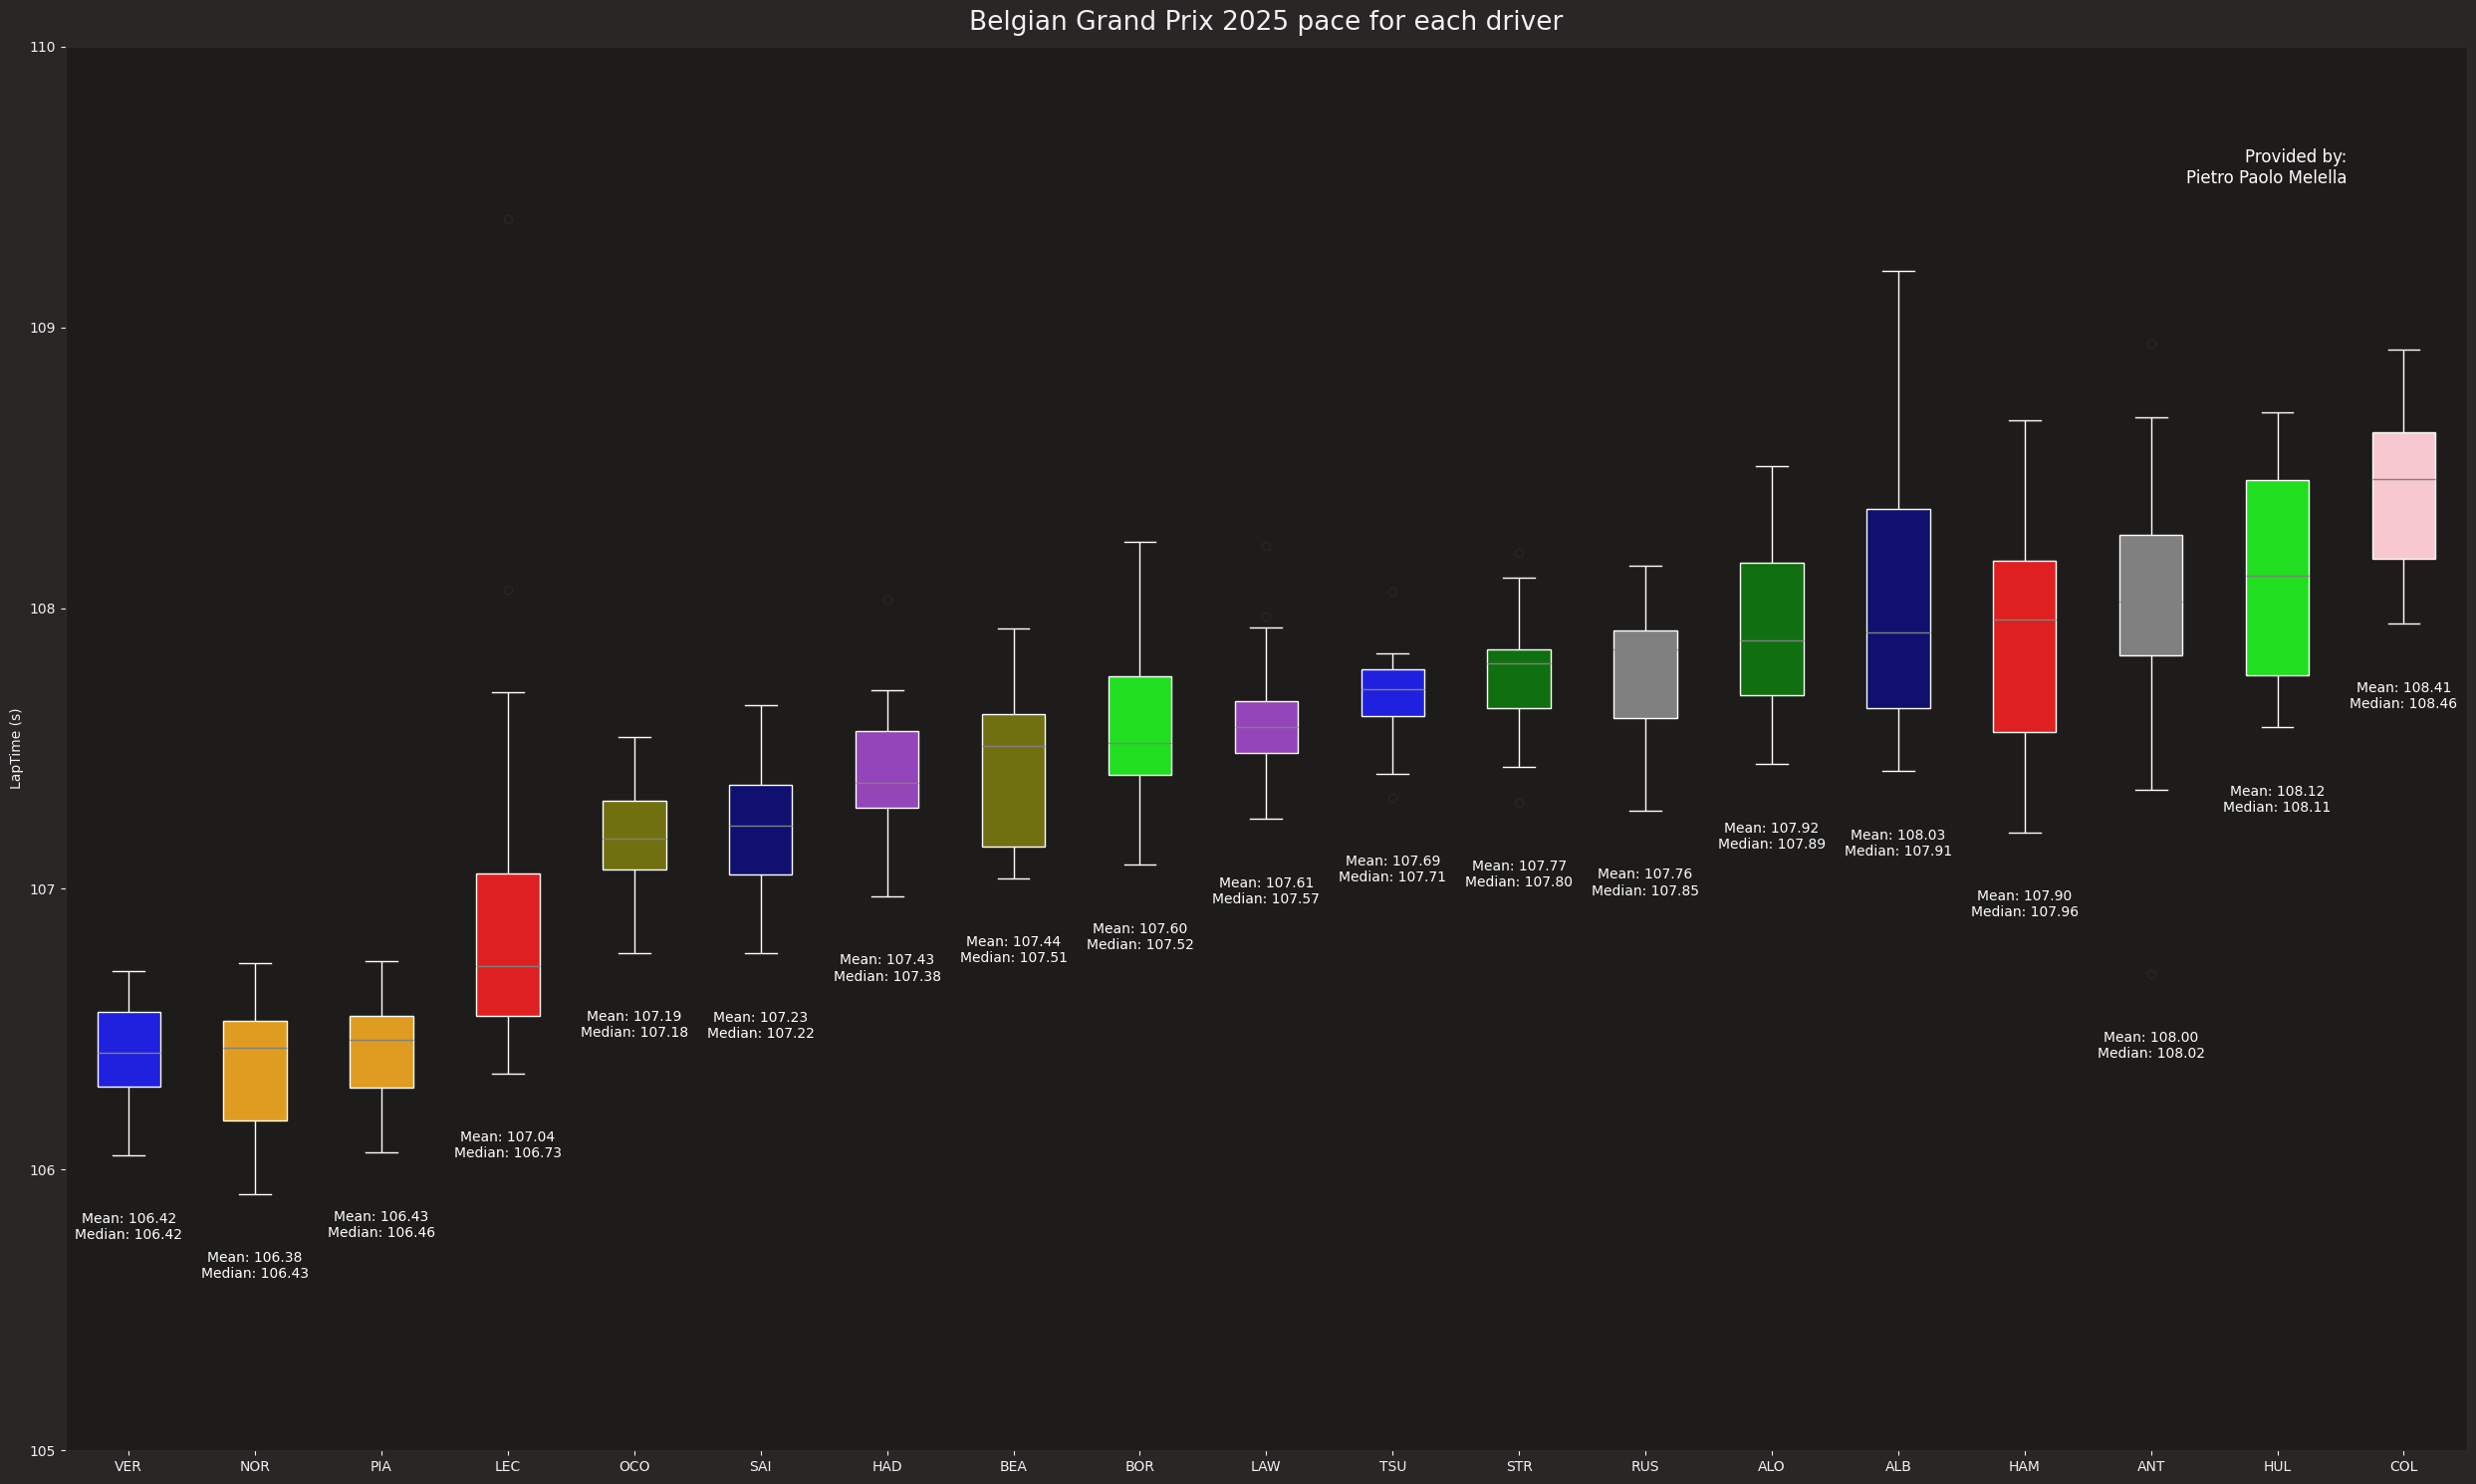

In [16]:
drivers_stats = transformed_laps.groupby('Driver')['LapTime (s)'].agg(['mean', 'median', 'min', 'max'])

median_lap_times = drivers_stats['median']

# Sort the drivers based on the median lap times
sorted_drivers = median_lap_times.sort_values().index

fig, ax = plt.subplots(figsize=(25, 15))  # Increased figure size to accommodate wider boxes
sns.boxplot(
    data=transformed_laps,
    x="Driver",
    y="LapTime (s)",
    hue="Driver",  # Assigning the `x` variable to `hue`
    palette=colors,
    order=sorted_drivers,
    whiskerprops=dict(color="white"),
    boxprops=dict(edgecolor="white"),
    medianprops=dict(color="grey"),
    capprops=dict(color="white"),
    width=0.5,  # Increased width value
    dodge=False,  # Ensure that boxes are centered under each team name
    legend=False  # Disable the legend to avoid redundancy
)


# Loop through the teams and add mean and median text under each whisker
for i, drivers in enumerate(sorted_drivers):
    # Get the whisker positions (min or max depending on where you want to place the label)
    whisker_position = drivers_stats.loc[drivers, 'min']  # Adjust to 'max' if you want the label under the upper whisker

    mean_time = drivers_stats.loc[drivers, 'mean']
    median_time = drivers_stats.loc[drivers, 'median']

    # Place the text slightly below the whisker (min value in this case), adjust y-position
    ax.text(
        i, whisker_position - 0.3,  # Adjust the y position slightly below the whisker
        f'Mean: {mean_time:.2f}\nMedian: {median_time:.2f}',
        horizontalalignment='center', color='white', fontsize=10
    )


plt.title(f"{session.event['EventName']} {session.event.year} pace for each driver")
plt.grid(visible=False)

plt.text(
    0.95, 0.9, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='White', fontsize=12
)

# Set y-axis limit (based on data range, adjust accordingly)
ax.set_ylim(105,110)  # Example range, adjust based on your data
# x-label is redundant
ax.set(xlabel=None)
plt.tight_layout()
plt.show()

### 🕒 Average Gap to Fastest Driver

Here we measure each driver’s average gap (in seconds) to the fastest driver over the race.  
This gives a normalized view of performance, independent of just best laps.  
It helps highlight sustained race pace differences and exposes whether someone was consistently close to the front or significantly off-pace.

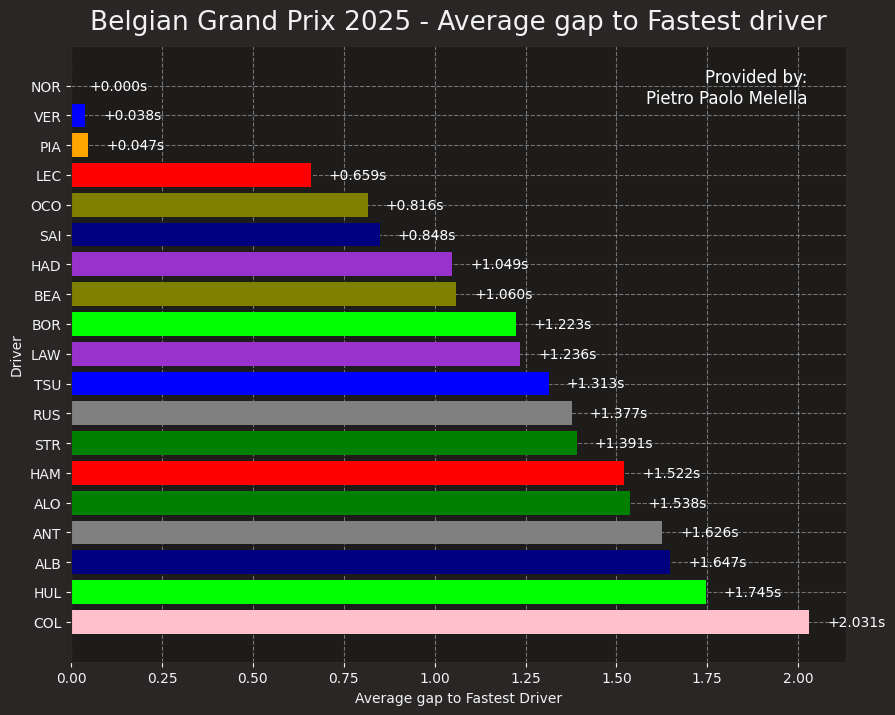

In [20]:
mean_lap_times = transformed_laps.groupby('Driver')['LapTime (s)'].mean()

# Find the fastest lap time
fastest_lap_time = mean_lap_times.min()

# Compute the gap from the fastest lap time for each driver
gap_from_fastest = mean_lap_times - fastest_lap_time

# Sort the gap_from_fastest for better visualization (fastest to slowest)
gap_from_fastest = gap_from_fastest.sort_values(ascending=True)


# Plot the data
plt.figure(figsize=(10, 8))
bars = plt.barh(gap_from_fastest.index, gap_from_fastest.values, color=[colors[driver] for driver in gap_from_fastest.index])
plt.xlabel("Average gap to Fastest Driver")
plt.ylabel("Driver")
plt.title(f"{session.event['EventName']} {session.event.year} - Average gap to Fastest driver")

# Add mean lap times as text labels on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.05, bar.get_y() + bar.get_height()/2, f'+{width:.3f}s',
             va='center', ha='left', color='white', fontsize=10)

plt.text(
    0.95, 0.9, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='White', fontsize=12
)

plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().invert_yaxis()  # To display the fastest on top
plt.show()

### 📊 Lap Time Consistency (Standard Deviation)

This analysis focuses on **consistency** by calculating the standard deviation of lap times for each driver.  
A lower standard deviation indicates smoother, more predictable performance — critical in race conditions for tyre management and strategy.  
Drivers with small variation often execute stints more efficiently, even if they aren’t the absolute fastest.

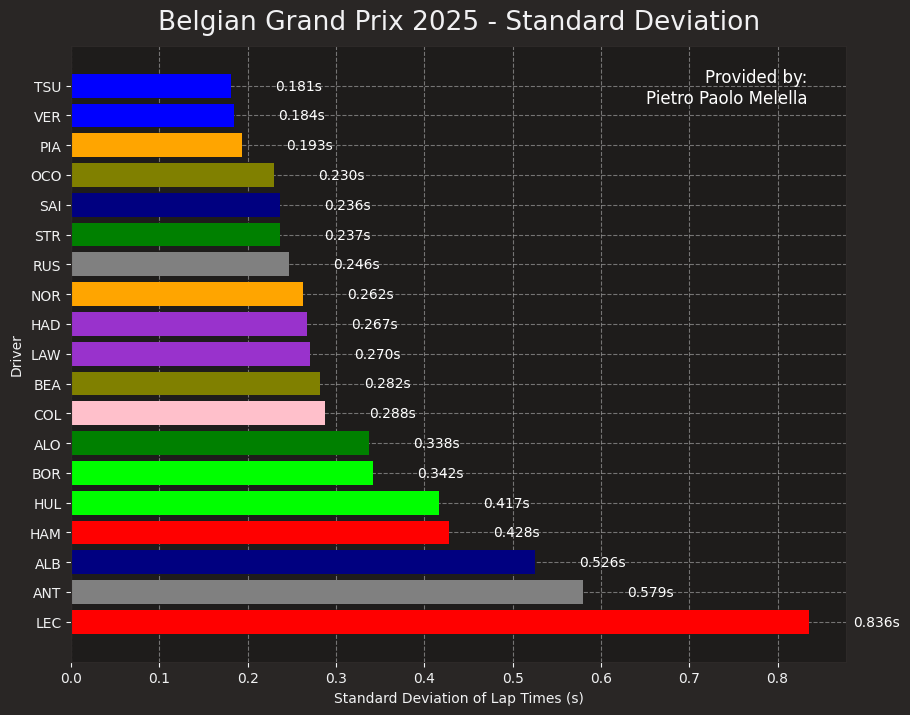

In [21]:
# Calculate the standard deviation of lap times for each driver
std_lap_times = transformed_laps.groupby('Driver')['LapTime (s)'].std()

# Sort the standard deviation values for better visualization (lowest to highest)
std_lap_times_sorted = std_lap_times.sort_values(ascending=True)

# Plot the data
plt.figure(figsize=(10, 8))
bars = plt.barh(std_lap_times_sorted.index, std_lap_times_sorted.values, 
                color=[colors[driver] for driver in std_lap_times_sorted.index])
plt.xlabel("Standard Deviation of Lap Times (s)")
plt.ylabel("Driver")
plt.title(f"{session.event['EventName']} {session.event.year} - Standard Deviation")

# Add standard deviation values as text labels on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.05, bar.get_y() + bar.get_height()/2, f'{width:.3f}s',
             va='center', ha='left', color='white', fontsize=10)

plt.text(
    0.95, 0.9, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='White', fontsize=12
)

plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().invert_yaxis()  # To display the most consistent drivers on top
plt.show()

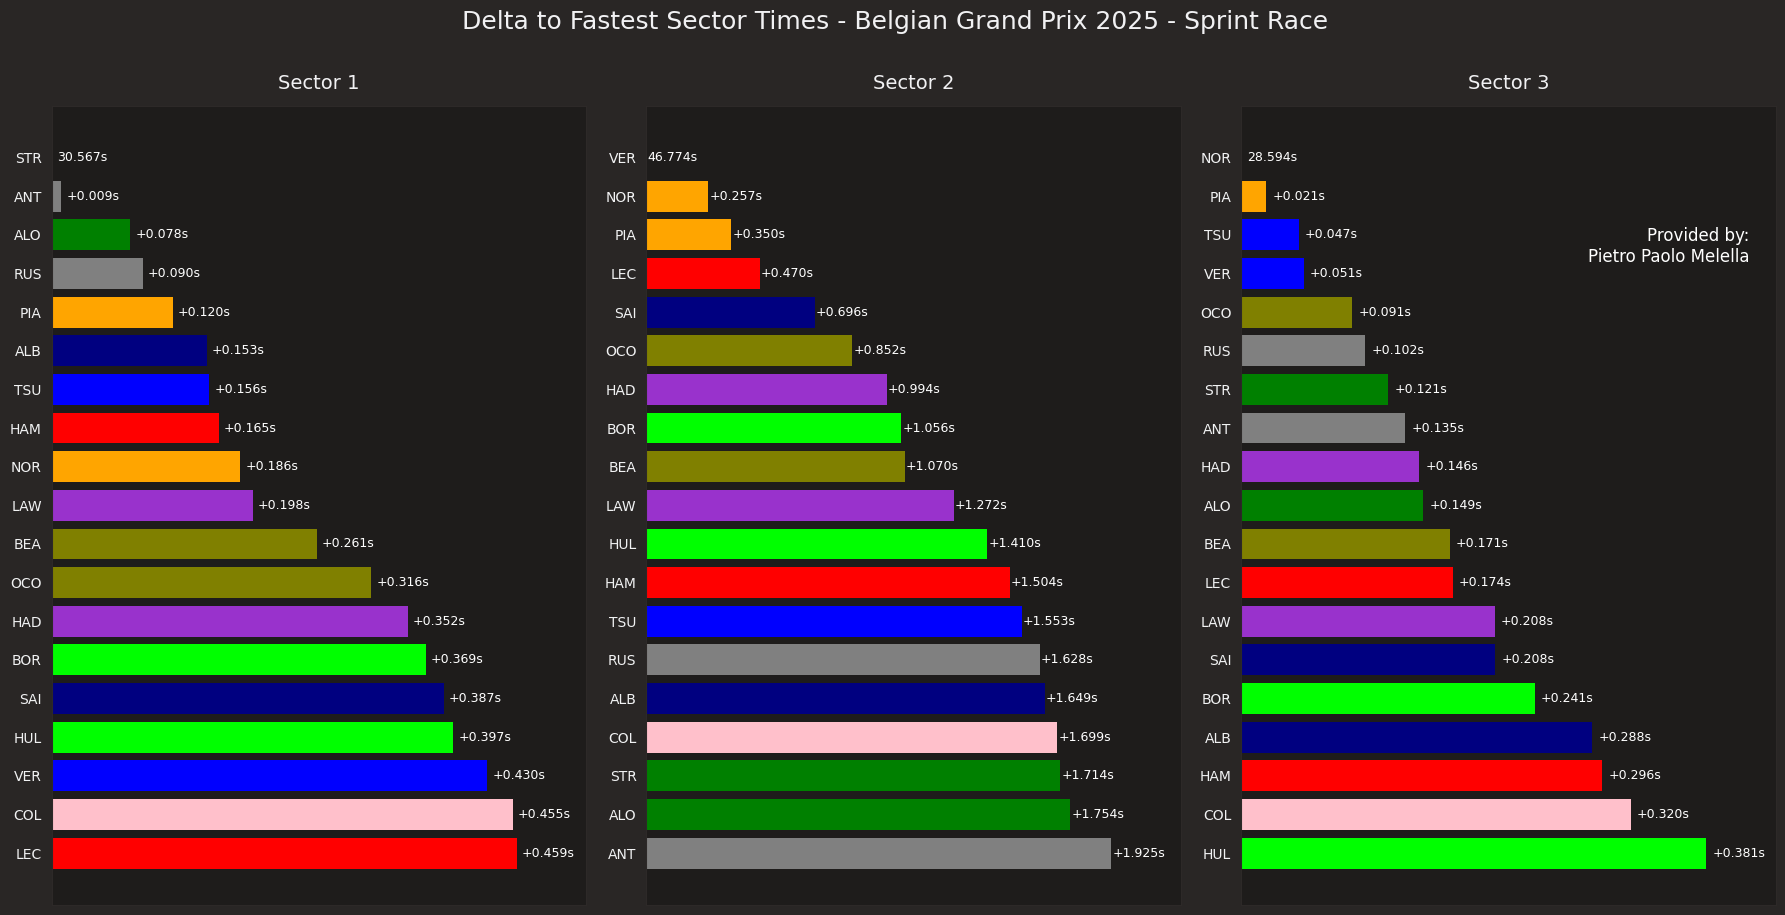

In [27]:
def plot_sector_deltas(
    laps_df,
    colors,
    figsize=(18, 10),
    sharey=False,
    suptitle=f"Delta to Fastest Sector Times - {session.event['EventName']} {session.event.year} - Sprint Race"
):
    """
    Compute per-driver average sector times, their delta to the fastest in each sector,
    and plot three side-by-side horizontal bar charts with annotations.

    Parameters
    ----------
    laps_df : pd.DataFrame
        DataFrame containing at least ['Driver','Sector1Time','Sector2Time','Sector3Time']
        where the SectorXTime columns are timedeltas.
    colors : dict
        Mapping from driver name to a matplotlib color.
    figsize : tuple
        Figure size passed to plt.subplots.
    sharey : bool
        Whether the three subplots share the same y-axis.
    suptitle : str
        The figure’s overall title.
    """
    # 1) average and convert to seconds
    avg = (
        laps_df
        .groupby('Driver')[['Sector1Time','Sector2Time','Sector3Time']]
        .mean()
        .reset_index()
    )
    for col in ['Sector1Time','Sector2Time','Sector3Time']:
        avg[col] = avg[col].dt.total_seconds()

    # 2) compute deltas
    for col in ['Sector1Time','Sector2Time','Sector3Time']:
        best = avg[col].min()
        avg[col.replace('Time','_Delta')] = avg[col] - best

    # 3) prepare sorted DataFrames
    s1 = avg[['Driver','Sector1Time','Sector1_Delta']].sort_values('Sector1_Delta')
    s2 = avg[['Driver','Sector2Time','Sector2_Delta']].sort_values('Sector2_Delta')
    s3 = avg[['Driver','Sector3Time','Sector3_Delta']].sort_values('Sector3_Delta')

    # 4) plot
    fig, axes = plt.subplots(1, 3, figsize=figsize, sharey=sharey)
    config = [
        ("Sector 1", s1, 'Sector1Time', 'Sector1_Delta'),
        ("Sector 2", s2, 'Sector2Time', 'Sector2_Delta'),
        ("Sector 3", s3, 'Sector3Time', 'Sector3_Delta'),
    ]

    for ax, (title, df, time_col, delta_col) in zip(axes, config):
        drivers = df['Driver']
        avg_times = df[time_col]
        deltas    = df[delta_col]
        cols      = [colors.get(d, 'black') for d in drivers]

        bars = ax.barh(drivers, deltas, color=cols)
        for bar, d, t in zip(bars, deltas, avg_times):
            txt = f"{t:.3f}s" if d == 0 else f"+{d:.3f}s"
            ax.text(
                bar.get_width() + 0.005,
                bar.get_y() + bar.get_height()/2,
                txt,
                va='center', ha='left',
                fontsize=9, color='white'
            )
        pad = deltas.max() * 0.15
        ax.set_xlim(0, deltas.max() + pad)
        ax.set_title(title, fontsize=14)
        ax.invert_yaxis()
        ax.tick_params(left=False, labelleft=True,
                       bottom=False, labelbottom=False)
        ax.set_xlabel("")
        ax.grid(False)

    plt.text(
    0.95, 0.8, 'Provided by:\nPietro Paolo Melella',
    verticalalignment='bottom', horizontalalignment='right',
    transform=plt.gca().transAxes,
    color='White', fontsize=12
)
    plt.suptitle(suptitle, fontsize=18, y=0.94)
    plt.tight_layout(rect=[0, 0.03, 1, 0.93])
    plt.show()
    return fig, axes

# assuming `transformed_laps` is your DataFrame and `colors` your dict:
fig, axes = plot_sector_deltas(transformed_laps, colors)